In [5]:
import two_d_to_3d
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./plot_style_mk.mplstyle')
%matplotlib inline

Text(0, 0.5, 'Y')

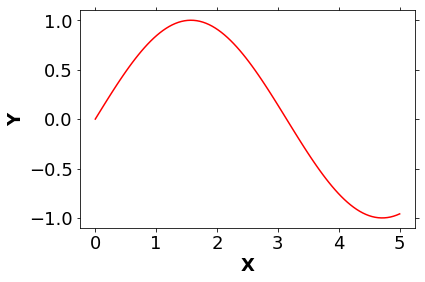

In [6]:
x = np.linspace(0,5,100)
y = np.sin(x)#np.power(x,2)

fig1, ax1 = plt.subplots()
ax1.plot(x, y, color = 'red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

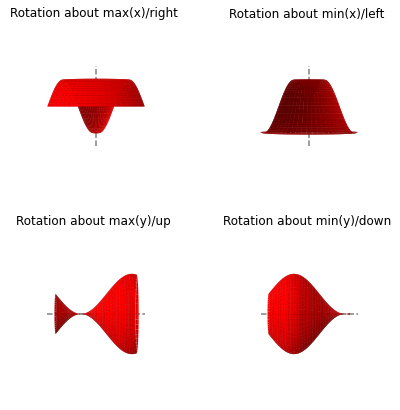

In [7]:
xr, yr,zr = two_d_to_3d.revolve(x, y, axis_loc='right')
xl, yl,zl = two_d_to_3d.revolve(x, y, axis_loc='left')
xu, yu,zu = two_d_to_3d.revolve(x, y, axis_loc='up')
xd, yd,zd = two_d_to_3d.revolve(x, y, axis_loc='down')

wx = abs((np.max(x)-np.min(x))*0.1)
wy = abs((np.max(x)-np.min(x))*0.1)

fig2 = plt.figure(figsize = (7, 7))
ax2 = fig2.add_subplot(2,2,1, projection='3d')
ax2.plot_surface(xr, yr, zr, color = 'red')
ax2.plot([0, 0], [0, 0], [min(y)-wy, max(y)+wy], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about max(x)/right')
ax2.axis('off')
ax2 = fig2.add_subplot(2,2,2, projection='3d')
ax2.plot_surface(xl, yl, zl, color = 'red')
ax2.plot([0, 0], [0, 0], [min(y)-wy, max(y)+wy], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about min(x)/left')
ax2.axis('off')
ax2 = fig2.add_subplot(2,2,3, projection='3d')
ax2.plot_surface(xu, yu, zu, color = 'red')
ax2.plot([min(x)-wx, max(x)+wx], [0, 0], [0, 0], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about max(y)/up')
ax2.axis('off')             
ax2 = fig2.add_subplot(2,2,4, projection='3d')
ax2.plot_surface(xd, yd, zd, color = 'red')
ax2.plot([min(x)-wx, max(x)+wx], [0, 0], [0, 0], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)     
ax2.set_title('Rotation about min(y)/down')
ax2.axis('off')
plt.show()